## Network analysis

In [21]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, convex_hull_plot_2d, delaunay_plot_2d
import networkx as nx
import collections

In [22]:
path = "datasets/fish-5-features.csv"
data = mkit.read_data(path)
data.head()

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,turning
0,1,312,405.29,417.76,0.0,0.210217,-0.018039,0.0,1,0.0
1000,1,511,369.99,428.78,0.0,0.020944,0.000236,0.0,1,0.0
2000,1,607,390.33,405.89,0.0,0.070235,0.004961,0.0,1,0.0
3000,1,811,445.15,411.94,0.0,0.370500,0.017482,0.0,1,0.0
4000,1,905,366.06,451.76,0.0,0.118000,-0.006333,0.0,1,0.0


### Obtaining a list of graphs, based on delaunay triangulations
Caclulate a network list for each timestep based on delaunay. trinangulation. Each timestep carries the respective graph with data attached to nodes, edges and graph. Just insert time and animal specific x and y coordinate data.

In [23]:
#Calculates a network list for each timestep based on delaunay triangulation (currently only one available)
#mkit.network_time_graphlist(data)

#Parameters
# A list of all graphs
graphs = mkit.network_time_graphlist(data)

Extracting all absolute features:   0%|          | 0/100 [00:00<?, ?it/s]/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/movekit-0.0.post1.dev281+g535ff04.d20220301-py3.9.egg/movekit/feature_extraction.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_animal_id_groups[aid]['distance'] = ((p1 -
/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/timkl

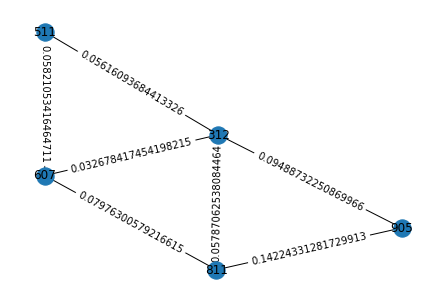

In [24]:
# Visualizing the graph for time step '3'-

labels = nx.get_node_attributes(graphs[2], 'animal_id')

pos = nx.spring_layout(graphs[2])


nx.draw(graphs[2], pos)
node_labels = nx.get_node_attributes(graphs[2], 'animal_id')
nx.draw_networkx_labels(graphs[2], pos=pos, labels=node_labels)

edge_labels = nx.get_edge_attributes(graphs[2], 'distance')
nx.draw_networkx_edge_labels(graphs[2], pos=pos, edge_labels=edge_labels)
plt.show()

In [25]:
# Display all graph attributes at time 3
graphs[2].graph

{'time': 3,
 'x_centroid': 395.392,
 'y_centroid': 423.234,
 'medoid': 312,
 'polarization': 0.323949515577163,
 'total_dist': 1.025155304577569,
 'mean_speed': 0.1556100759950875,
 'mean_acceleration': -0.0003387029795760603,
 'mean_distance_centroid': 29.691399999999998,
 'centroid_direction': 3.8847758774932765e-06}

In [26]:
# Display all edges at time 3
graphs[2].edges

EdgeView([(312, 811), (312, 607), (312, 511), (312, 905), (811, 905), (811, 607), (607, 511)])

In [27]:
# Display the distance of one node pair at time 3
graphs[2].edges[312, 811]

{'distance': 0.05787062538084464}

In [28]:
# Display all attributes of node 312 at time 3
graphs[2].nodes[312]

{'time': 3,
 'animal_id': 312,
 'x': 405.31,
 'y': 417.07,
 'distance': 0.30000000000001137,
 'average_speed': 0.17472339975245438,
 'average_acceleration': -0.0180393818878736,
 'direction': 0.0003593718378133304,
 'stopped': 1,
 'turning': -0.0001320760075815941,
 'x_centroid': 395.392,
 'y_centroid': 423.234,
 'medoid': 312.0,
 'distance_to_centroid': 11.677}

### Network analysis

The networkx package enables to analyze the extracted graphs over time. See doc: https://networkx.org/documentation/stable/index.html

In [29]:
len(graphs)

1000

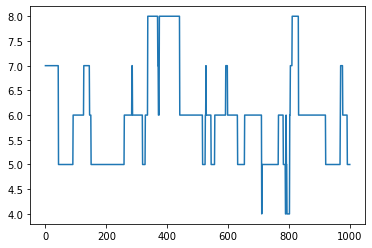

In [30]:
# Plot number of nodes over time
num_edges = []
for G in graphs: 
    num_edges.append(nx.number_of_edges(G))

plt.plot(num_edges)
plt.show()

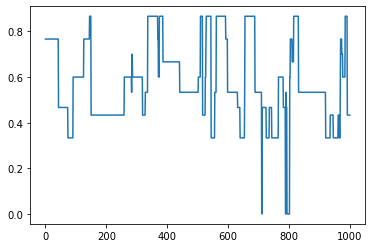

In [31]:
# Plot clustering coefficient over time
avg_cluster = []
for G in graphs: 
    avg_cluster.append(nx.average_clustering(G))

plt.plot(avg_cluster)
plt.show()

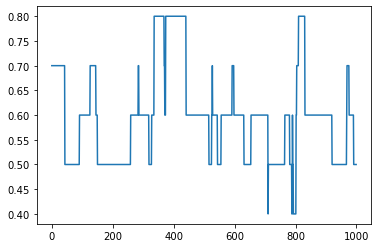

In [32]:
# Plot density over time
dens = []
for G in graphs: 
    dens.append(nx.density(G))

plt.plot(dens)
plt.show()

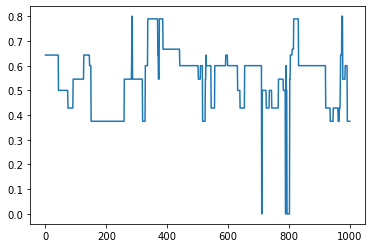

In [33]:
# Plot transitivity over time
trans = []
for G in graphs: 
    trans.append(nx.transitivity(G))

plt.plot(trans)
plt.show()

__Compute features for individiual nodes__

In [34]:
# Pick the first graph 
G = graphs[0]

In [35]:
# Degree 
dict(G.degree())

{312: 4, 811: 3, 905: 2, 607: 3, 511: 2}

In [36]:
# Degree centraility 
nx.degree_centrality(G)

{312: 1.0, 811: 0.75, 905: 0.5, 607: 0.75, 511: 0.5}

In [37]:
# Clustering coefficient 
nx.clustering(G)

{312: 0.5,
 811: 0.6666666666666666,
 905: 1.0,
 607: 0.6666666666666666,
 511: 1.0}

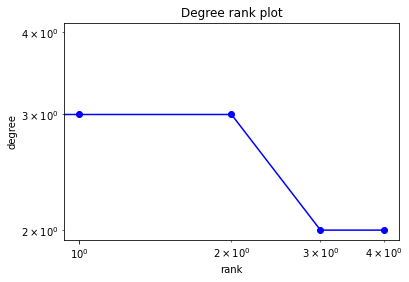

In [38]:
# Degree rank 
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

__For more methods please check the networkX doc: https://networkx.org/documentation/stable/index.html__